In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

In [161]:
df= pd.read_csv('card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [163]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [164]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
no = len(df[df['fraud'] == 0]['fraud'])
yes = len(df[df['fraud'] == 1]['fraud'])
no_perc = round(no/len(df)*100,1)
yes_perc = round(yes/len(df)*100,1)

print('Number of transactions aren\'t fraud: {} ({}%)'.format(no, no_perc))
print('Number of transactions are fraud: {} ({}%)'.format(yes, yes_perc))

Number of transactions aren't fraud: 912597 (91.3%)
Number of transactions are fraud: 87403 (8.7%)


<AxesSubplot:xlabel='distance_from_home', ylabel='Density'>

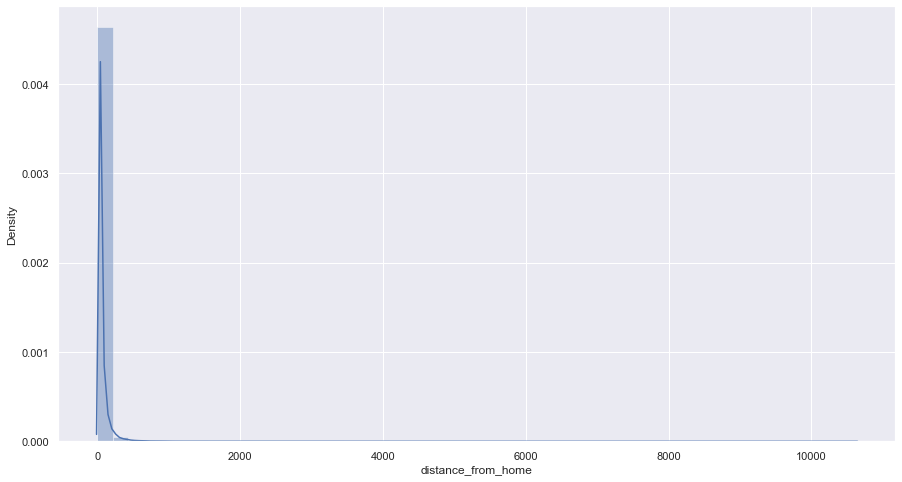

In [166]:
sns.set(style ="darkgrid")
sns.distplot(df.distance_from_home)

In [167]:
# EDA without outlier
def outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.index[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return df_out

index_list= []
for i in ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']:
    index_list.extend(outlier(df,i))

def remove(df, ls):
    ls= sorted(set(ls))
    df= df.drop(ls)
    return df

eda = remove(df,index_list)

In [168]:
eda = eda.iloc[:,[0,1,2,7]]
eda

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud
0,57.877857,0.311140,1.945940,0.0
1,10.829943,0.175592,1.294219,0.0
2,5.091079,0.805153,0.427715,0.0
3,2.247564,5.600044,0.362663,0.0
4,44.190936,0.566486,2.222767,0.0
...,...,...,...,...
999995,2.207101,0.112651,1.626798,0.0
999996,19.872726,2.683904,2.778303,0.0
999997,2.914857,1.472687,0.218075,0.0
999998,4.258729,0.242023,0.475822,0.0


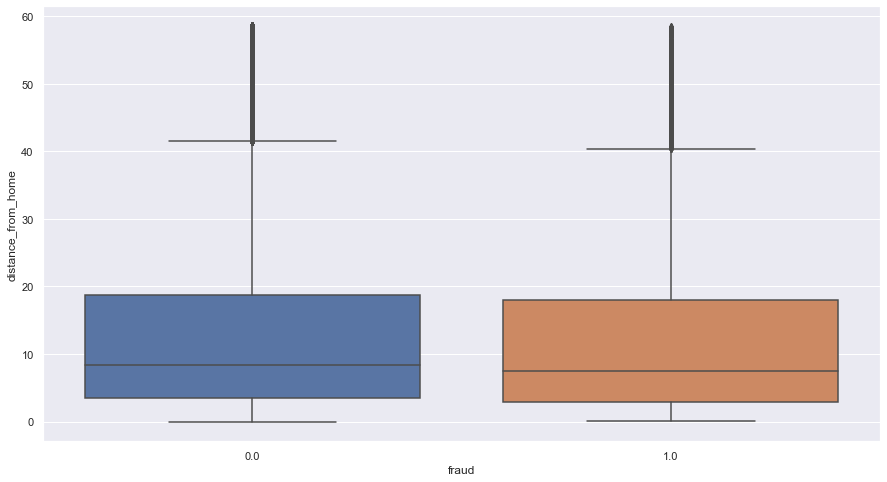

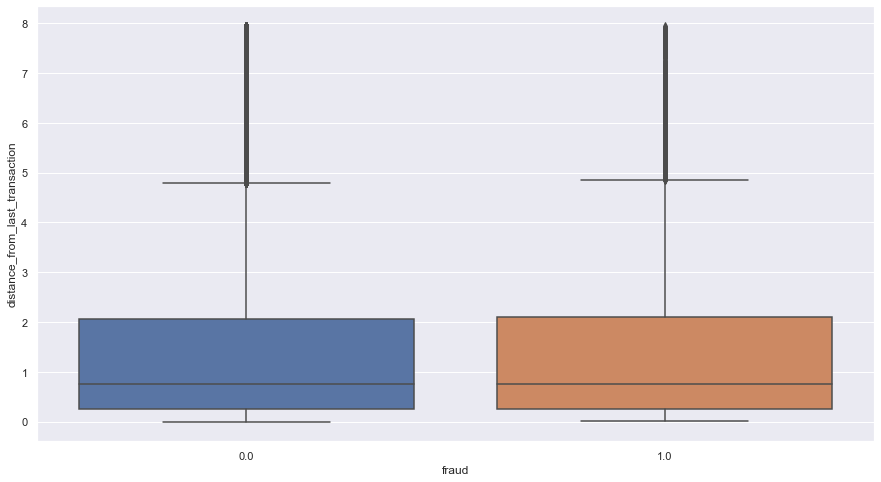

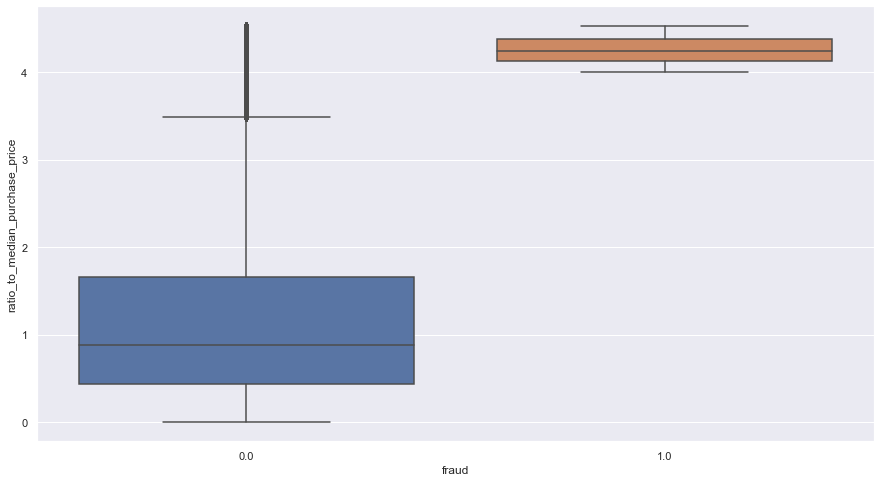

In [169]:
sns.set(rc = {'figure.figsize':(15,8)})
for col in ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']:
    plt.figure(col)
    sns.set(style ="darkgrid")
    sns.boxplot(x=eda['fraud'],y=eda[col],data=eda)

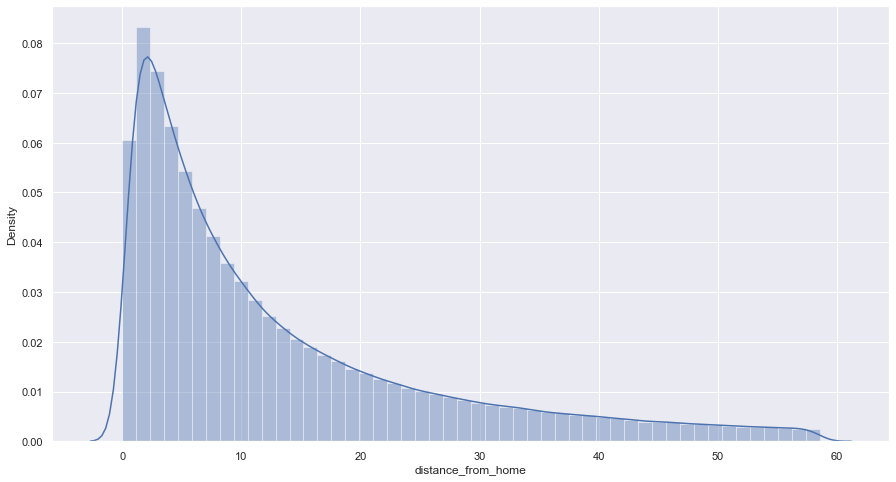

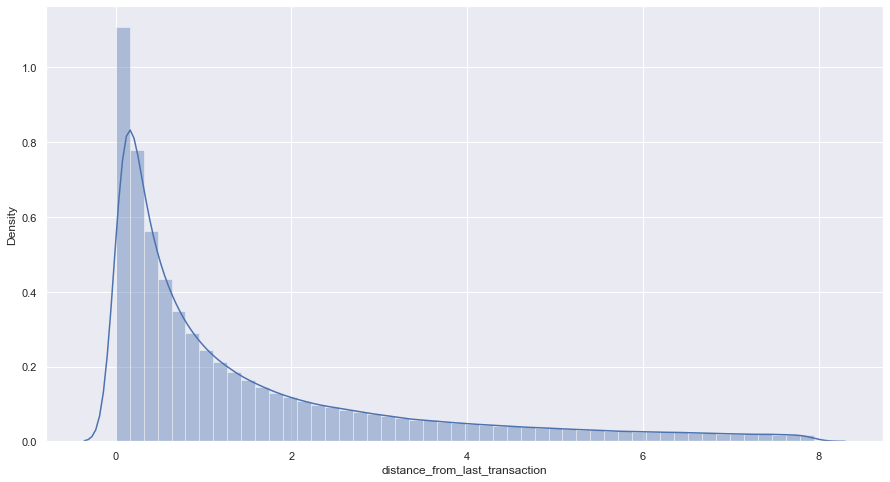

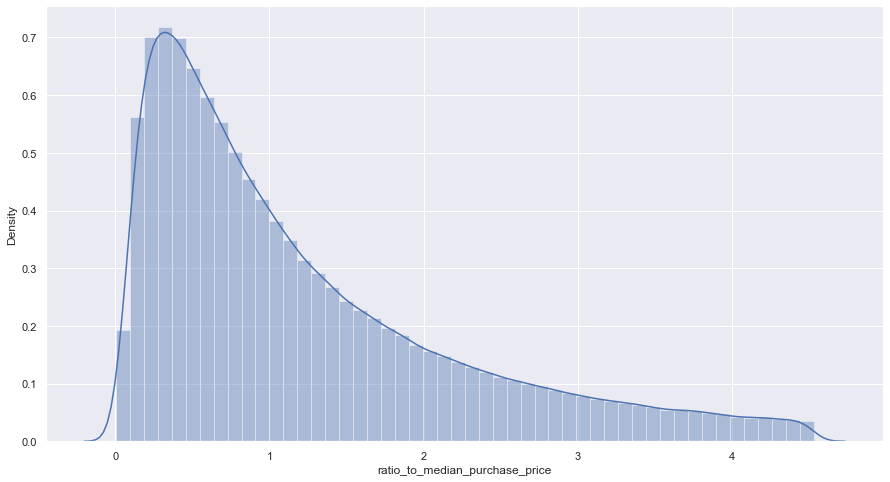

In [170]:
for i in ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']:
    plt.figure(i)
    sns.set(style ="darkgrid")
    sns.distplot(eda[i])

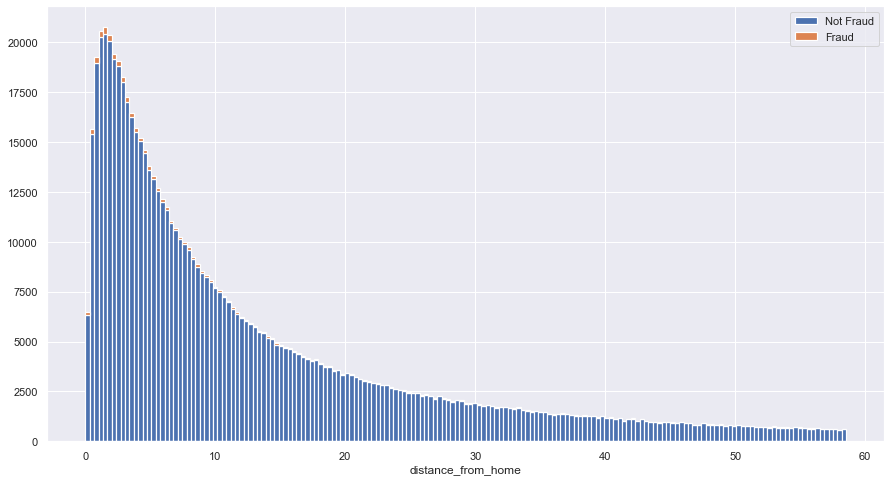

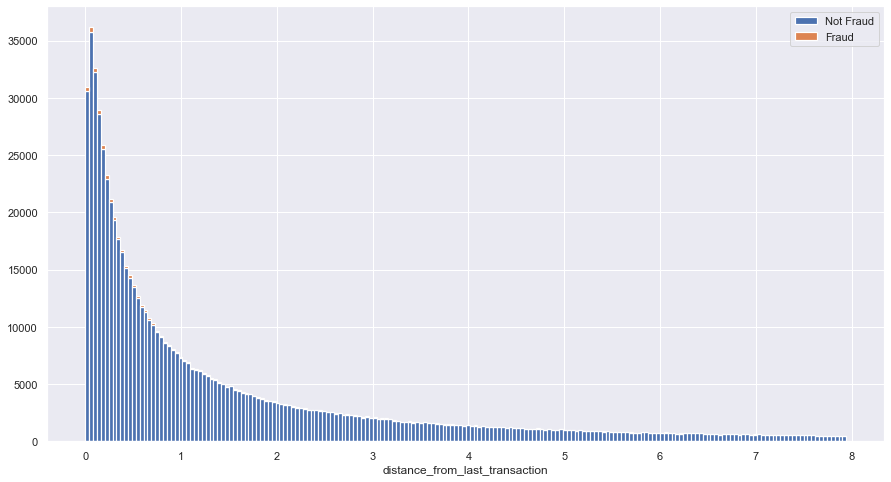

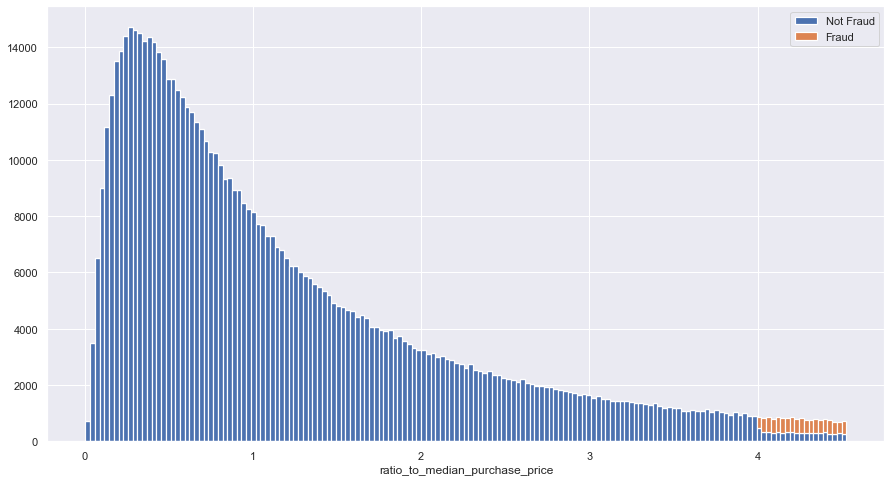

In [171]:
for col in ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']:
    plt.rcParams["figure.figsize"] = (15,8)
    plt.hist([eda[(eda.fraud==0)][col],eda[(eda.fraud==1)][col]],stacked=True, bins = 'auto',label = ['Not Fraud','Fraud'],linewidth=1.2)
    plt.xlabel(col)
    plt.ylabel('')
    plt.legend()
    plt.show()

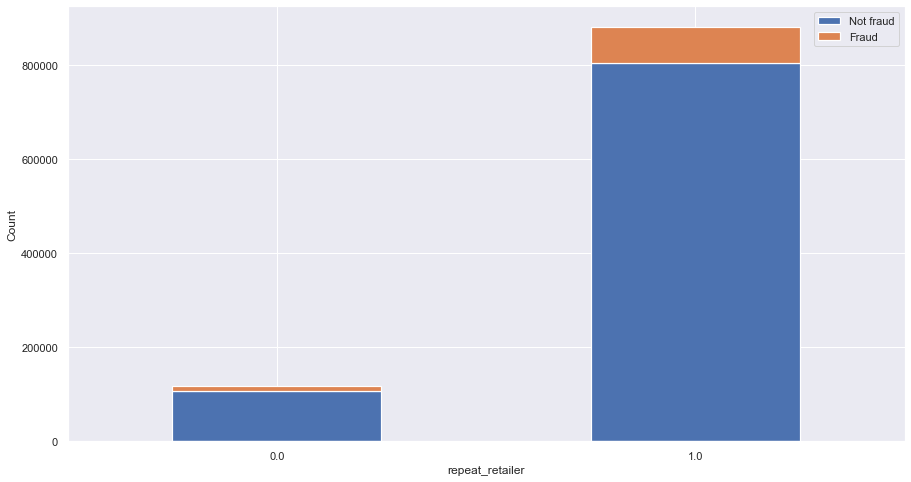

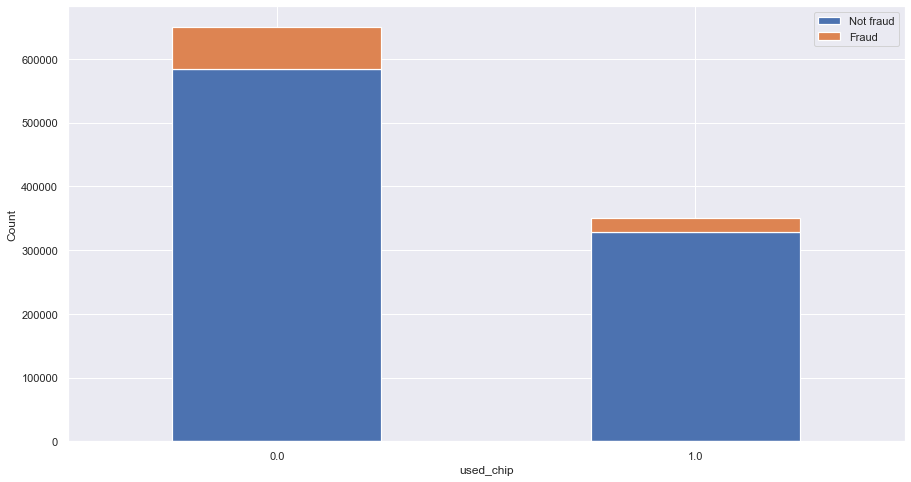

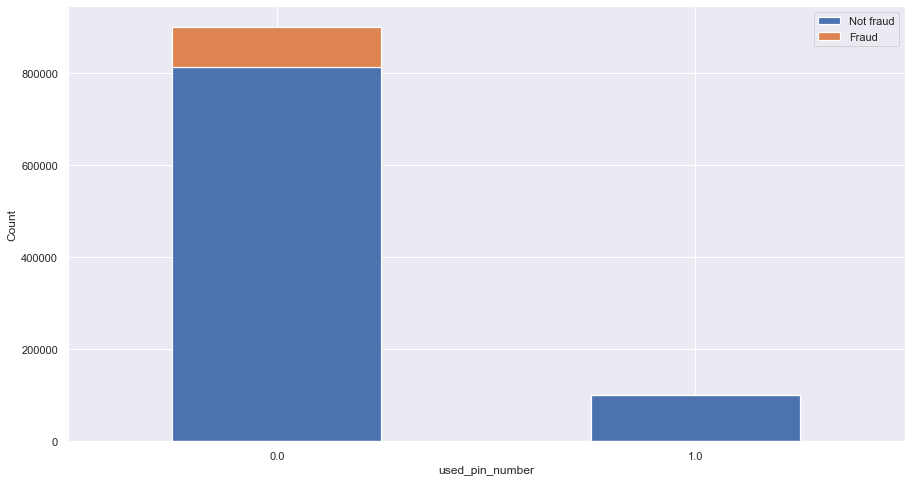

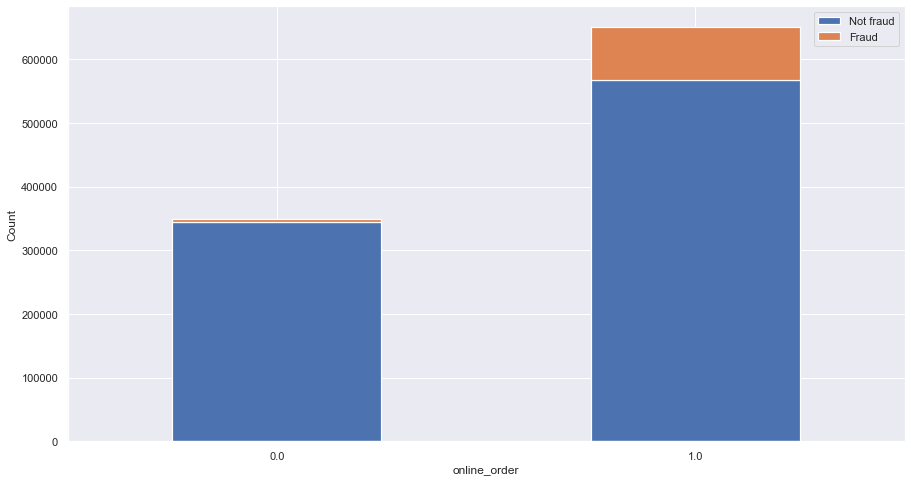

In [172]:
column= ['repeat_retailer','used_chip','used_pin_number','online_order']
for col in column:
    object = df.groupby([col,'fraud'])['fraud'].count().unstack(level=1)
    object.plot(kind = 'bar', stacked = True,rot = 0, figsize=(15,8),linewidth=1.2)
    plt.legend(['Not fraud','Fraud'])
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()

In [173]:
# Selecting input and output for the models
X = df.drop('fraud',axis=1)
y = df['fraud']

In [174]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# under= RandomUnderSampler()
# over = SMOTE()
# X,y = under.fit_resample(X, y)

In [175]:
# # Summarize class distribution
# from collections import Counter
# counter = Counter(y)
# print(counter)

In [176]:
# Splitting the data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [177]:
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# param_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [10, 20, 30, 40, 50, None]}


In [178]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_Grid= GridSearchCV(estimator=rf,param_grid= param_grid,cv=3,verbose=2,n_jobs=4)

In [179]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


KeyboardInterrupt: 

In [ ]:
rf_Grid.best_params_

{'max_depth': 30, 'n_estimators': 50}

In [ ]:
# Training the data
classifier = RandomForestClassifier(n_estimators = 50,max_depth = 30, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=50,
                       random_state=42)

In [ ]:
# Predicting the y and arrange the predicted y and actual y for confusion matrix
y_pred = classifier.predict(X_test)

In [ ]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,classifier.predict(X_test)))
print(classification_report(y_test,classifier.predict(X_test)))
print('Random Forest accuracy: ', accuracy_score(y_test,classifier.predict(X_test)))

[[17472     2]
 [    0 17488]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17474
         1.0       1.00      1.00      1.00     17488

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962

Random Forest accuracy:  0.999942795034609


In [ ]:
importance = classifier.feature_importances_
FT = pd.DataFrame({'FeatureName': X.columns, 'Random Forest Feature Importance': importance})
FT.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
2,ratio_to_median_purchase_price,0.507141
0,distance_from_home,0.189275
6,online_order,0.117987
1,distance_from_last_transaction,0.099862
5,used_pin_number,0.041561
4,used_chip,0.034883
3,repeat_retailer,0.009291


<AxesSubplot:ylabel='FeatureName'>

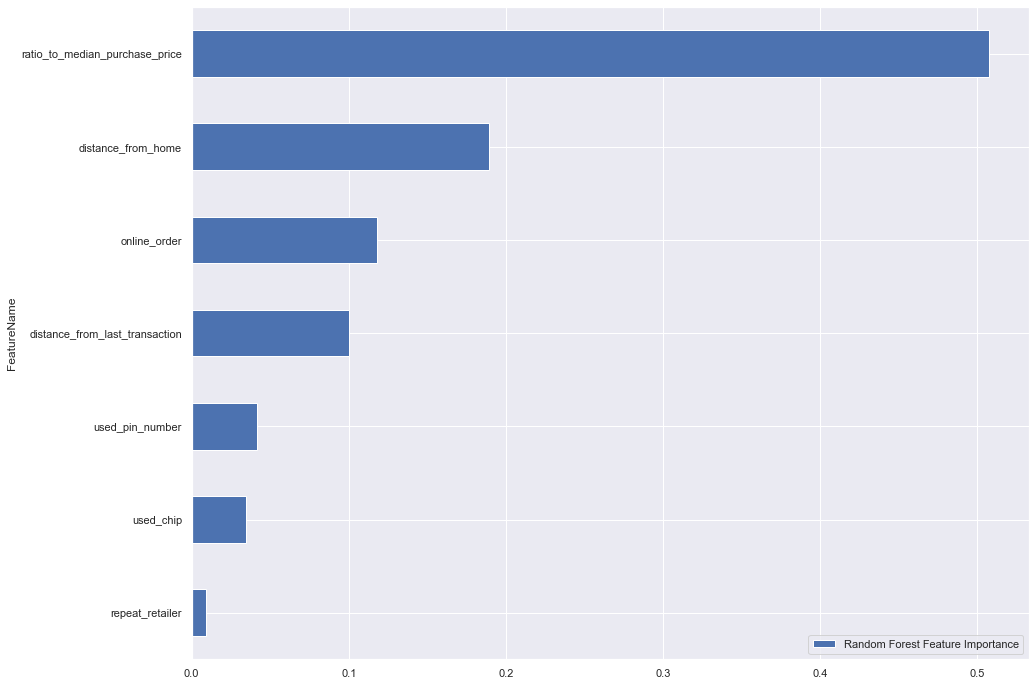

In [ ]:
FT.sort_values("Random Forest Feature Importance").plot(figsize=(15,12), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

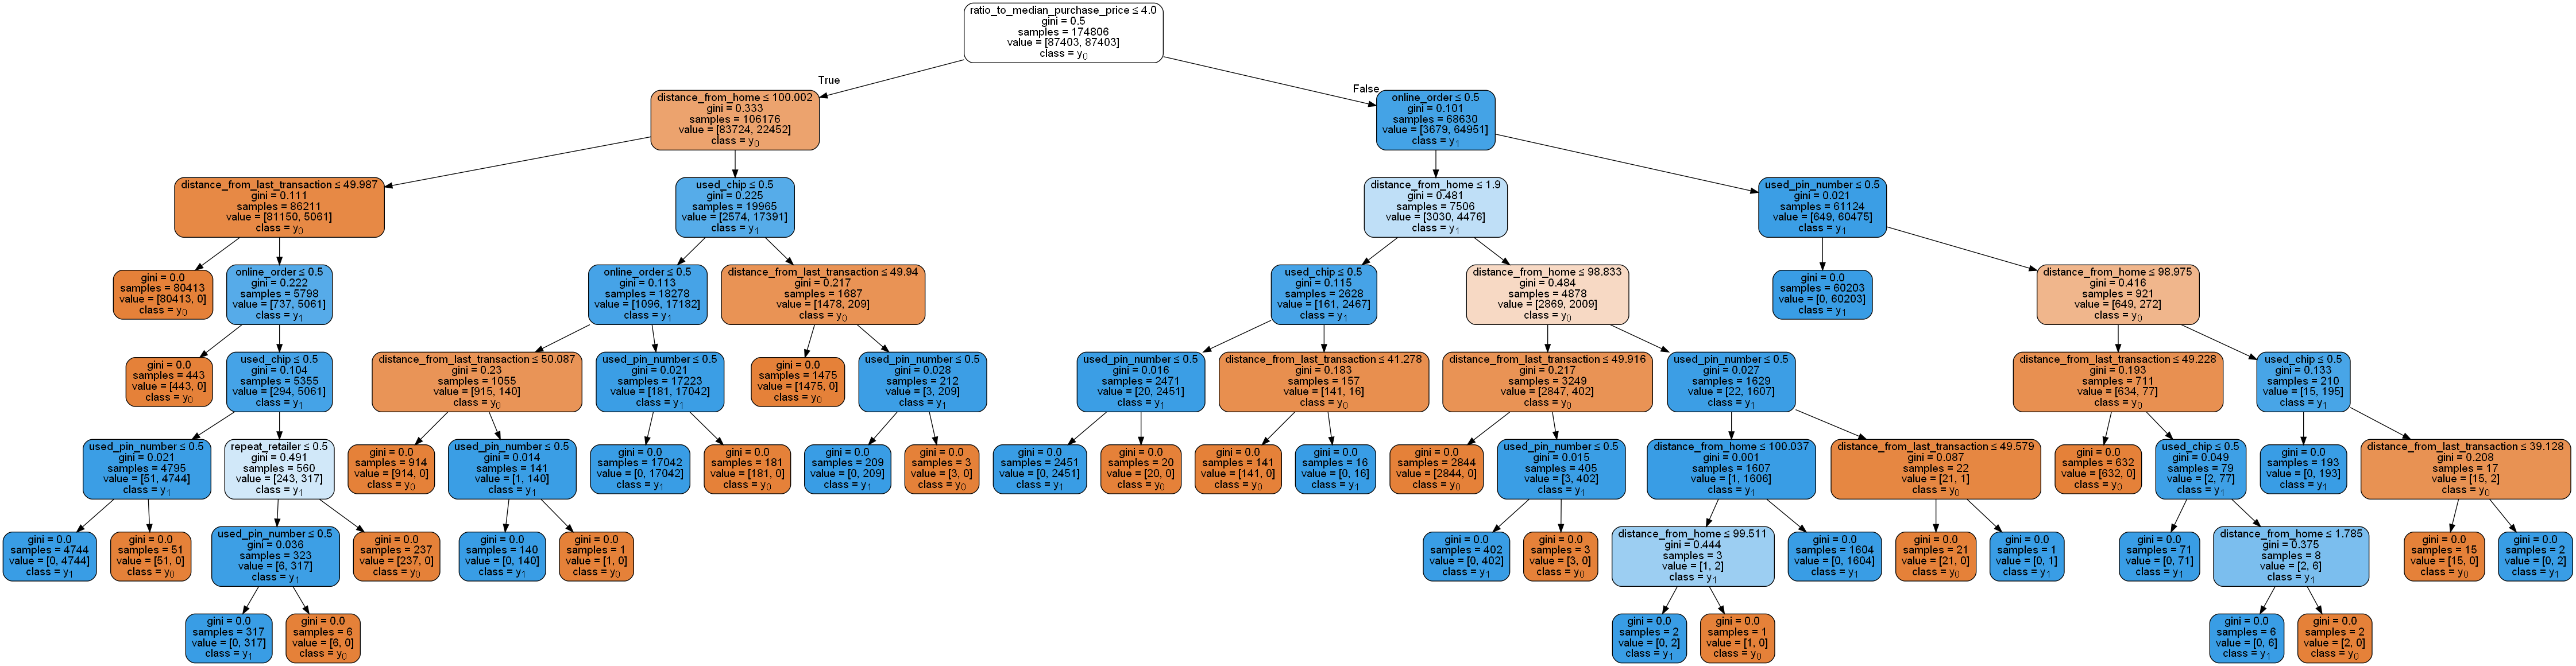

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from graphviz import Digraph
dot_data = StringIO()
clf = DecisionTreeClassifier()
clf.fit(X.values, y.ravel())
export_graphviz(clf, out_file=dot_data,feature_names=X.columns,class_names=True,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())